**Part 2. AI Agent 활용 프로젝트**

- Chapter 04. 사전구축 Agent

    - **📒[실습]** Clip 03. AI Data Science Team Agent

# EDA Tools Agent

EDA(Exploratory Data Analysis)를 위한 에이전트

- Missing Data with `missingno`
- EDA Reporting with `sweetviz`
- Correlation Analysis with `pytimetk` correlation funnel
- And more!


In [1]:
import pandas as pd

df = pd.read_csv("data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000019AA72F0150>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000019AA75F1550>, root_client=<openai.OpenAI object at 0x0000019AA7377E10>, root_async_client=<openai.AsyncOpenAI object at 0x0000019AA75E4550>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Agent 생성하기

In [4]:
from ai_data_science_team.ds_agents import EDAToolsAgent
from ai_data_science_team.utils.matplotlib import matplotlib_from_base64
from ai_data_science_team.utils.plotly import plotly_from_dict
from ai_data_science_team.utils.html import open_html_file_in_browser

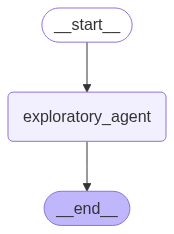

In [5]:
exploratory_agent = EDAToolsAgent(
    llm, 
    invoke_react_agent_kwargs={"recursion_limit": 10},
)
exploratory_agent

In [6]:
exploratory_agent.invoke_agent("What tools do you have access to? Return a table.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * POST-PROCESSING EDA RESULTS


Here's a table of the available tools:

| Tool Name                  | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| explain_data              | Provides an extensive, narrative summary of a DataFrame including its shape, column types, and samples.     |
| describe_dataset          | Computes and returns summary statistics for the dataset using pandas' describe() method.                     |
| visualize_missing         | Missing value analysis using the missingno library, generating matrix plots, bar plots, and heatmaps.       |
| generate_correlation_funnel| Correlation analysis using the correlation funnel method, binarizing data and computing correlation with a target. |
| generate_sweetviz_report  | Creates an Exploratory Data Analysis (EDA) report using the Sweetviz library.                               |
| generate_dtale_report     | Creates an interactive data exploration report using the dtale library.                                     |

If you need further details on any specific tool, feel free to ask!

In [7]:
exploratory_agent.invoke_agent("Give me information on the correlation funnel tool.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * POST-PROCESSING EDA RESULTS


The correlation funnel tool is designed to analyze the correlation between various features in a dataset and a specific target variable. This tool uses a method of binarization to assess how well different features correlate with the specified target, making it particularly useful in exploratory data analysis (EDA).

### Key Parameters:
1. **target**: This is the main variable of interest that you want to analyze correlation against. The tool will look for columns that start with this target name followed by a double underscore (e.g., `target__Yes`, `target__No`).

2. **target_bin_index**: This parameter allows you to specify which level of the target variable to analyze. You can provide an integer index (e.g., `0` for the first group) or a string that represents a specific group (e.g., `"Yes"`).

3. **corr_method**: This defines the correlation method to be used. Options include:
   - `'pearson'`: Measures linear correlation.
   - `'kendall'`: A non-parametric measure of correlation.
   - `'spearman'`: Assess the relationship between two variables without assuming a linear relationship.

4. **n_bins**: This parameter determines the number of bins to use for binarizing continuous variables.

5. **thresh_infreq**: This represents the threshold for infrequent levels. If the proportion of a level is below this threshold, it can be grouped into a category such as '-OTHER'.

6. **name_infreq**: This is the label given to infrequent levels when they are combined.

### Use Cases:
- Identifying which features have strong correlations with a target variable.
- Understanding how various features impact target outcomes in predictive modeling.
- Binarizing categorical variables for better analysis and interpretation.

### Outputs:
The tool typically returns correlation values or visualizations (depending on its implementation) that show the relationship strength and direction between features and the target variable.

This functionality can be particularly insightful for businesses looking to enhance their decision-making processes or improve their predictive models based on historical data.

#### Example 1: Explain data(`explain_data`) tool

In [8]:
exploratory_agent.invoke_agent(
    user_instructions="What are the first 5 rows of the data?",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: explain_data
    * POST-PROCESSING EDA RESULTS


The first 5 rows of the data are as follows:

| PassengerId | Survived | Pclass | Name                                                        | Sex    | Age  | SibSp | Parch | Ticket          | Fare     | Cabin | Embarked |
|-------------|----------|--------|-------------------------------------------------------------|--------|------|-------|-------|------------------|----------|-------|----------|
| 1           | 0        | 3      | Braund, Mr. Owen Harris                                     | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500   | NaN   | S        |
| 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Thayer)       | female | 38.0 | 1     | 0     | PC 17599         | 71.2833  | C85   | C        |
| 3           | 1        | 3      | Heikkinen, Miss. Laina                                      | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250   | NaN   | S        |
| 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)               | female | 35.0 | 1     | 0     | 113803           | 53.1000  | C123  | S        |
| 5           | 0        | 3      | Allen, Mr. William Henry                                    | male   | 35.0 | 0     | 0     | 373450           | 8.0500   | NaN   | S        |

### Summary of Additional Information
- **Total Rows**: 891
- **Total Columns**: 12
- **Column Types**: Includes integers and floating points for numeric values, and objects for strings (e.g., names, ticket information).
- **Missing Values**: Notably, the 'Cabin' column has 77.10% missing values, and 'Age' has 19.87% missing values.

#### Example 2: Describe data set(`describe_dataset`) tool

In [9]:
exploratory_agent.invoke_agent(
    user_instructions="Describe the dataset.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: describe_dataset
    * POST-PROCESSING EDA RESULTS


Summary statistics for the dataset have been computed. If you need details such as count, mean, standard deviation, min, quartiles, and max for specific columns, please let me know!

In [10]:
artifacts = exploratory_agent.get_artifacts()

artifacts.keys()

dict_keys(['describe_df'])

In [11]:
pd.DataFrame(artifacts['describe_df'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Example 3: Missing data(`visualize_missing`) tool


`pip install missingno`

In [12]:
exploratory_agent.invoke_agent(
    user_instructions="Visualize missing data in the dataset using the visualize_missing tool.",
    data_raw=df,
)

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: visualize_missing


c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\ai_data_science_team\tools\eda.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


    * POST-PROCESSING EDA RESULTS


The missing data visualizations have been successfully generated, including a matrix plot, bar plot, and heatmap plot. If you need a specific analysis or further details on the missing data, please let me know!

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [13]:
exploratory_agent.get_artifacts().keys()

dict_keys(['matrix_plot', 'bar_plot', 'heatmap_plot'])

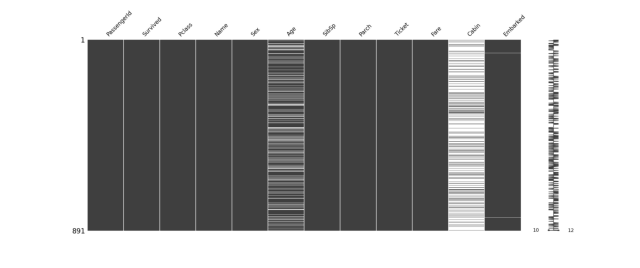

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [14]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['matrix_plot'],
)


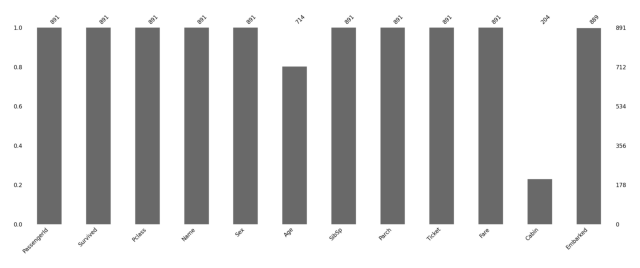

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [15]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['bar_plot'],
)

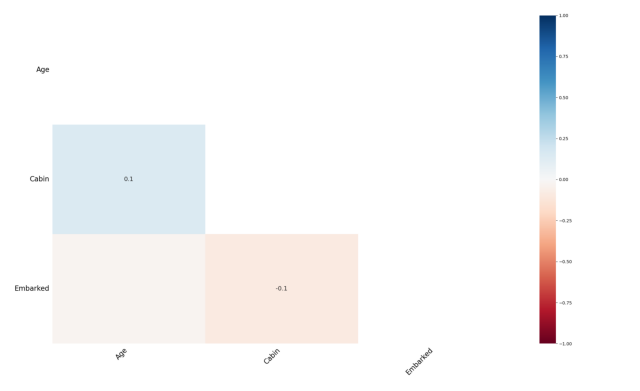

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [16]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['heatmap_plot'],
)

In [17]:
df = df.dropna(subset=['Age', 'Cabin', 'Embarked'])

#### Example 4: Correlation Funnel(`generate_correlation_funnel`) Tool

`pip install pytimetk`

In [18]:
exploratory_agent.invoke_agent(
    user_instructions="Use the correlation funnel tool to analyze the dataset. Use the Survived feature as the target. Use Survived=1 as the bin index to compare against.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: generate_correlation_funnel


c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 7 x 6.0 in image.
c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: <_io.BytesIO object at 0x0000019ACB8C08B0>
c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


26 [0.55038966 0.96054419]
27 [0.65592298 0.33729332]
28 [ 0.21625802 -0.645531  ]
29 [ 0.91986041 -0.54017542]
30 [-0.56685882 -0.60211334]
31 [0.00552147 0.6882957 ]
32 [-0.49786254 -0.84698922]
33 [ 0.64068875 -0.0199746 ]
34 [ 0.37422082 -0.41711639]
35 [0.68377588 0.11423045]
36 [0.31492454 0.99351452]
37 [0.87886404 0.95108992]
38 [-0.14542186  0.04668456]
39 [-0.93785655  0.41855202]
40 [-0.63781488 -0.1272861 ]
11 [-0.81132657  0.01656974]
12 [-0.83858387  0.9432624 ]
13 [ 0.66675737 -0.1602789 ]
14 [0.71845156 0.15663862]
15 [-0.81704751  0.51742527]
16 [ 0.86508518 -0.12044491]
17 [-0.46042321 -0.78897675]
18 [ 0.77252066 -0.77619298]
19 [-0.68536432  0.92030799]
20 [ 0.20637695 -0.14626435]
21 [-0.33501071  0.65954721]
22 [-0.12027287 -0.27643566]
23 [ 0.03372029 -0.79130745]
24 [-0.37918744 -0.68111184]
25 [-0.8492582   0.06085532]
6 [-0.77481574  0.38629196]
7 [-0.57026342  0.81369344]
8 [-0.6864686  -0.71213314]
9 [-0.15957476 -0.95302837]
10 [-0.1146829  0.4770474]
1 [-0

The correlation funnel has been successfully computed using the Pearson method for the target level **Survived__1**. This analysis allows for a detailed comparison of various features against the survival outcome in the dataset. If you need further details or visualizations based on this analysis, please let me know!

In [19]:
exploratory_agent.get_artifacts().keys()

dict_keys(['correlation_data', 'plot_image', 'plotly_figure'])

In [20]:
pd.DataFrame(exploratory_agent.get_artifacts()['correlation_data'])

,feature,bin,correlation
0,Survived,0,-1.000000
1,Survived,1,1.000000
2,Sex,male,-0.532418
3,Sex,female,0.532418
4,Ticket,-OTHER,-0.213121
...,...,...,...
110,Cabin,D,-0.001503
111,SibSp,3,-0.001503
112,Ticket,230080,-0.001503
113,Cabin,F2,-0.001503


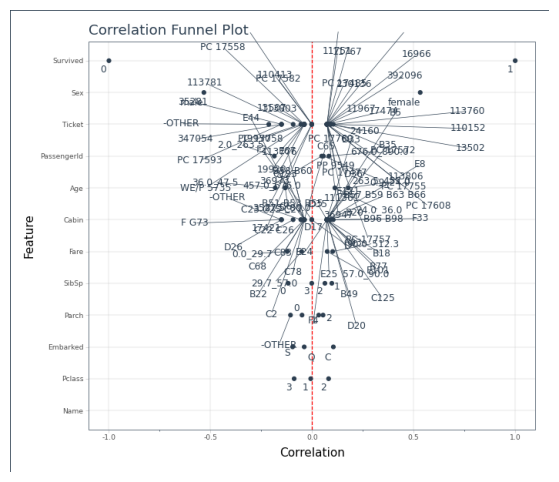

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [21]:
matplotlib_from_base64(exploratory_agent.get_artifacts()['plot_image'])

In [22]:
plotly_from_dict(exploratory_agent.get_artifacts()['plotly_figure'])

#### Example 5: Sweetviz(`generate_sweetviz_report`) Tool

`pip install sweetviz`

In [23]:
exploratory_agent.invoke_agent(
    user_instructions="Generate a Sweetviz report for the dataset. Use the Survived feature as the target.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: generate_sweetviz_report
    * Using temporary directory: C:\Users\pnylo\AppData\Local\Temp\tmp0qqqrjq5


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report C:\Users\pnylo\AppData\Local\Temp\tmp0qqqrjq5\sweetviz_report.html was generated.
    * POST-PROCESSING EDA RESULTS


The Sweetviz report has been generated and saved successfully. You can view it [here](C:\Users\pnylo\AppData\Local\Temp\tmp0qqqrjq5\sweetviz_report.html).

In [24]:
exploratory_agent.get_artifacts().keys()

dict_keys(['report_file', 'report_html'])

In [25]:
open_html_file_in_browser(exploratory_agent.get_artifacts()['report_file'])